In [1]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SchwiftyNotebook_Layer_Refined")' SchwiftyNotebook_Layer_Refined

Installing packages:
	.package(path: "/home/ubuntu/workspace/fast-ai-swift/SchwiftyNotebook_Layer_Refined")
		SchwiftyNotebook_Layer_Refined
With SwiftPM flags: []
Working in: /tmp/tmps7miau9l/swift-install
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information 

In [2]:
//export
import Path
import TensorFlow
import SchwiftyNotebook_Layer_Refined

In [23]:
//export
typealias Scheduler = (Float) -> Float

func computeCosignPosition(start: Float,
                           stop: Float,
                           timePosition: Float) -> Float {
    return start + (1 + cos(Float.pi*(1 - timePosition))) * (stop - start) / 2 
}

public func createCosignSchedulerForRange(start: Float, stop: Float) -> (Float) -> Float {
    return { (timePosition: Float) -> Float in computeCosignPosition(start: start, 
                                   stop: stop, 
                                   timePosition: timePosition) }
}

In [4]:
import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

public let plotter = Python.import("matplotlib.pyplot")

In [17]:
//export
public extension  Double {
    var float: Float {
        return Float(self)
    }
}

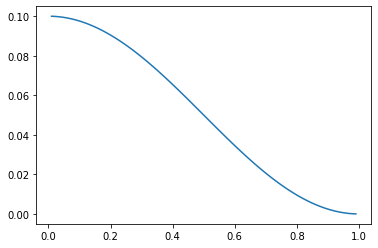

None


In [18]:
let lineSpace = Array(stride(from: 0.01.float, to: 1.0.float, by: 0.01.float))
let sineScheduler = createCosignSchedulerForRange(start: 1e-1, 
                                                  stop: 1e-6)
plotter.plot(lineSpace, lineSpace.map{sineScheduler($0)})
plotter.show()

In [24]:
//export
public func aggregateSchedulers(schedulers: [(Float) -> Float],
                         appliedPercentages: [Float]) -> (Float) -> Float {
    assert(appliedPercentages.reduce(0.0, { $0 + $1 }) == 1.0.float, 
           "Expected applied precentages to add up to one")
    
    let percentages = appliedPercentages
    assert(percentages.allSatisfy { $0 >= 0 }, 
          "expected percenteages to be non negative")
    
    let cumSum = percentages.reduce([0.0.float], { (a: [Float], x: Float) in a + [a[a.count - 1] + x] })
    let cumSumTensor = Tensor(cumSum)
    
    
    return { 
        timePosition in
        let currentIndex = Int((timePosition .>= cumSumTensor).nonZeroIndices().max().scalar!)
        let actualPosition = (timePosition - cumSum[currentIndex]) /
                                (cumSum[currentIndex + 1] - cumSum[currentIndex])
        return schedulers[currentIndex](actualPosition)
    }
}

In [20]:
let aggregatedScheduler = aggregateSchedulers(schedulers: [createCosignSchedulerForRange(start: 0.3.float, stop: 0.6.float),
                                               createCosignSchedulerForRange(start: 0.6.float, stop: 0.1.float)],
                                              appliedPercentages: [0.3.float, 0.7.float])

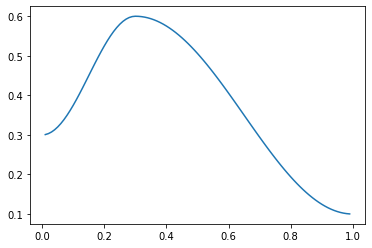

None


In [21]:
plotter.plot(lineSpace, lineSpace.map{aggregatedScheduler($0)})
plotter.show()

- Plot Learning Rate
- Plot Losses
- Print Statistics

In [22]:
//export
public func createDefaultScheduler() -> (Float) -> Float {
    return aggregateSchedulers(schedulers: [createCosignSchedulerForRange(start: 0.3.float, stop: 0.6.float),
                                               createCosignSchedulerForRange(start: 0.6.float, stop: 0.1.float)],
                                              appliedPercentages: [0.3.float, 0.7.float])
}

In [25]:
exportSchwiftyNotebook(notebookName: "Annealing")

success
